<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/OCT_data_fourthN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#saved webhook data

In [3]:
webhook_df = pd.read_csv("/content/drive/My Drive/webhook_df_oct.csv",  skiprows=range(1, 300000), nrows=100000)

In [4]:
webhook_df.head(5)

,Unnamed: 0,external_id,event,data
0,299999,6139019681147213,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."
1,300000,6239019681308087,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."
2,300001,6249019681348792,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."
3,300002,4636019681771379,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym..."
4,300003,1526019681962217,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym..."


In [5]:
#remove index column
cols = [0]
webhook_df.drop(webhook_df.columns[cols],axis=1,inplace=True)

In [6]:
#getting only authorized transactions
webhook = webhook_df[webhook_df.event == 'AUTHORISATION']

In [7]:
webhook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59990 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   external_id  59990 non-null  object
 1   event        59990 non-null  object
 2   data         59990 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [8]:
#getting saved dispute data for october

In [9]:
oct_disputes = pd.read_csv("/content/drive/My Drive/dispute_df_oct.csv")

In [10]:
oct_disputes.head(2)

,Unnamed: 0,company_account,merchant_account,psp_reference,merchant_reference,payment_method,record_date,record_date_timezone,dispute_currency,dispute_amount,record_type,dispute_psp_reference,dispute_reason,rfi_scheme_code,rfi_reason_code,cb_scheme_code,cb_reason_code,nof_scheme_code,nof_reason_code,payment_date,payment_date_timezone,payment_currency,payment_amount,dispute_date,dispute_date_timezone,dispute_arn,user_name,risk_scoring,shopper_interaction,shopper_name,shopper_email,shopper_reference,shopper_pan,iban,bic,shopper_ip,shopper_country,issuer_country,issuer_id,three_d_directory_response,three_d_authentication_response,cvc2_response,avs_response,dispute_auto_defended,dispute_end_date,dispute_end_date_timezone,reserved4,reserved5
0,0,RiideComp,RiideCompMP,1859020649491981,FINAL_PAYMENT_30811242,visa,2020-10-15 10:31:18+00:00,BST,EUR,9.14,NotificationOfFraud,7559026886734074,Fraudulent Use of Account Number,NaN,NaN,NaN,NaN,visa,6.0,2020-10-07 11:02:29+00:00,BST,GBP,8.4,2020-10-15 10:31:18+00:00,BST,74987500281000154677653,system,35,ContAuth,rhys thomas,kyrakelly20@outlook.com,RIIDE_USER_production_845203,100,NaN,NaN,NaN,NaN,GB,475140,NaN,NaN,0,6,NaN,2021-04-07 11:02:29+00:00,BST,NaN,NaN
1,1,RiideComp,RiideCompMP,1849014676254605,PREAUTH_production_1611974,visa,2020-10-15 10:29:34+00:00,BST,EUR,9.11,NotificationOfFraud,7549026885709328,Fraudulent Use of Account Number,NaN,NaN,NaN,NaN,visa,6.0,2020-09-30 13:07:05+00:00,BST,GBP,9.1,2020-10-15 10:29:34+00:00,BST,74987500274005078834941,system,-30,ContAuth,Lauren mulvihill,laurenthegreat2017@outlook.com,RIIDE_USER_production_1264991,5014,NaN,NaN,NaN,NaN,GB,465943,NaN,NaN,0,6,NaN,2021-03-30 13:07:05+00:00,BST,NaN,NaN


In [11]:
cols = [0]
oct_disputes.drop(oct_disputes.columns[cols],axis=1,inplace=True)

In [12]:
#getting chargebaks
chargebacks = oct_disputes[oct_disputes.record_type == 'Chargeback']

In [13]:
webhook['external_id'] = webhook['external_id'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
pd.merge(webhook, chargebacks, left_on='external_id', right_on='psp_reference') #looks like only 9 are chargebacks

,external_id,event,data,company_account,merchant_account,psp_reference,merchant_reference,payment_method,record_date,record_date_timezone,dispute_currency,dispute_amount,record_type,dispute_psp_reference,dispute_reason,rfi_scheme_code,rfi_reason_code,cb_scheme_code,cb_reason_code,nof_scheme_code,nof_reason_code,payment_date,payment_date_timezone,payment_currency,payment_amount,dispute_date,dispute_date_timezone,dispute_arn,user_name,risk_scoring,shopper_interaction,shopper_name,shopper_email,shopper_reference,shopper_pan,iban,bic,shopper_ip,shopper_country,issuer_country,issuer_id,three_d_directory_response,three_d_authentication_response,cvc2_response,avs_response,dispute_auto_defended,dispute_end_date,dispute_end_date_timezone,reserved4,reserved5
0,1636015576633183,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",RiideComp,RiideCompMP,1636015576633183,FINAL_PAYMENT_30482255,visa,2020-10-26 09:59:24+00:00,GMT,EUR,5.55,Chargeback,7436033859588643,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-01 14:07:43+00:00,BST,GBP,5.00,2020-10-22 21:08:24+00:00,BST,74987500275000303003536,system,65,ContAuth,Not Provided,justmina72@gmail.com,cus_Eqa3AnpxFl4Svw,8213,NaN,NaN,NaN,NaN,GB,465944,NaN,NaN,0,0,NaN,2020-11-09 21:08:24+00:00,GMT,NaN,NaN
1,4536018492103732,AUTHORISATION,"{""additionalData"":{""metadata.booking_id"":""3069...",RiideComp,RiideCompMP,4536018492103732,FINAL_PAYMENT_30697356,visa,2020-10-14 13:37:55+00:00,BST,EUR,3.97,Chargeback,7436025163717868,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-04 23:06:50+00:00,BST,GBP,3.60,2020-10-12 16:26:44+00:00,BST,74987500278000550093831,system,35,ContAuth,satish Thomas,jasongomes982@icloud.com,RIIDE_USER_production_1456326,2005,NaN,NaN,NaN,NaN,GB,492913,NaN,NaN,0,6,NaN,2020-10-30 16:26:44+00:00,GMT,NaN,NaN
2,1739023244025242,AUTHORISATION,"{""additionalData"":{""metadata.booking_id"":""3097...",RiideComp,RiideCompMP,1739023244025242,FINAL_PAYMENT_30974838,visa,2020-10-22 13:42:59+00:00,BST,EUR,7.75,Chargeback,7436026019533954,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-10 11:06:42+00:00,BST,GBP,7.00,2020-10-13 16:14:33+00:00,BST,74987500284000191546835,system,35,ContAuth,Amy Graves,ru51hee@icloud.com,RIIDE_USER_production_951374,711,NaN,NaN,NaN,NaN,GB,492181,NaN,NaN,0,6,NaN,2020-10-31 16:14:33+00:00,GMT,NaN,NaN
3,1856041144164504,AUTHORISATION,"{""additionalData"":{""metadata.booking_id"":""3200...",RiideComp,RiideCompMP,1856041144164504,FINAL_PAYMENT_32007904,visa,2020-11-09 08:44:06+00:00,GMT,EUR,6.60,Chargeback,7559045929376933,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-31 03:20:16+00:00,GMT,GBP,5.90,2020-11-05 21:17:43+00:00,GMT,74987500305000052087254,system,35,ContAuth,jake anthony clark,bello@gmmalo.com,RIIDE_USER_production_1809104,8013,NaN,NaN,NaN,NaN,GB,465865,NaN,NaN,0,6,NaN,2020-11-23 21:17:43+00:00,GMT,NaN,NaN
4,4536039119635955,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",RiideComp,RiideCompMP,4536039119635955,PREAUTH_production_1910767,visa,2020-12-11 08:21:28+00:00,GMT,EUR,18.66,Chargeback,7436075305590244,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-28 19:06:03+00:00,GMT,GBP,16.80,2020-12-09 22:49:49+00:00,GMT,74987500302009678888733,system,-30,ContAuth,P H GRIFFITHS,danielgriffiths1995@hotmail.com,RIIDE_USER_production_1509166,2028,NaN,NaN,NaN,NaN,GB,465902,NaN,NaN,0,6,NaN,2020-12-27 22:49:49+00:00,GMT,NaN,NaN
5,1359026147870969,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",RiideComp,RiideCompMP,1359026147870969,PREAUTH_production_1756446,visa,2020-10-28 12:06:10+00:00,GMT,EUR,18.18,Chargeback,7559036423385389,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-13 19:46:27+00:00,BST,GBP,16.39,2020-10-25 16:13:16+00:00,GMT,74987500287008071005852,system,0,ContAuth,l a Mullally,luke.mullally@hotmail.com,RIIDE_USER_production_1104191,5013,NaN,NaN,NaN,NaN,GB,465902,

In [15]:
result = pd.merge(webhook, chargebacks, how = 'left',left_on='external_id', right_on='psp_reference')

In [16]:
result = result[['external_id', 'event', 'data', 'psp_reference']]

In [17]:
result.head()

,external_id,event,data,psp_reference
0,6139019681147213,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN
1,6239019681308087,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN
2,6249019681348792,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN
3,4636019681771379,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",NaN
4,1526019681962217,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",NaN


In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59990 entries, 0 to 59989
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   external_id    59990 non-null  int64  
 1   event          59990 non-null  object 
 2   data           59990 non-null  object 
 3   psp_reference  12 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [19]:
result.columns = ['external_id', 'event', 'data', 'chargeback']

In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59990 entries, 0 to 59989
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   external_id  59990 non-null  int64  
 1   event        59990 non-null  object 
 2   data         59990 non-null  object 
 3   chargeback   12 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [21]:
result.chargeback.fillna(0,inplace=True)

In [22]:
result["chargeback"]=result["chargeback"].apply(lambda x: 1 if x!=0 else 0)

In [23]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59990 entries, 0 to 59989
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   external_id  59990 non-null  int64 
 1   event        59990 non-null  object
 2   data         59990 non-null  object
 3   chargeback   59990 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [24]:
result['chargeback'].value_counts()

0    59978
1       12
Name: chargeback, dtype: int64

plotting with labels

In [25]:
import seaborn as sns

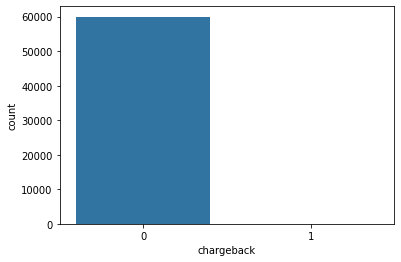

In [26]:
sns.countplot(x = 'chargeback', data = result)

In [27]:
#normalisation

In [28]:
import json
import numpy as np
from pandas.io.json import json_normalize

In [29]:
flat_df = json_normalize(result.data.apply(json.loads))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [30]:
flat_df.head()

,eventCode,eventDate,merchantAccountCode,merchantReference,paymentMethod,pspReference,reason,success,additionalData.fraudCheck-75-PaymentDetailCarteBancaireRefCheck,additionalData.refusalReasonRaw,additionalData.eci,additionalData.metadata.company,additionalData.fraudCheck-63-TransactionAmountCheck,additionalData.fraudCheck-8-ShopperEmailUsage,additionalData.fraudCheck-64-TransactionAmountVelocity,additionalData.xid,additionalData.fraudCheck-52-DistinctPaymentDetailUsageByShopper,additionalData.threeDAuthenticated,additionalData.paymentMethodVariant,additionalData.fraudCheck-2-CardChunkUsage,additionalData.billingAddress.country,additionalData.fraudCheck-91-ShopperStrongAuthenticationCheck,additionalData.metadata.shopper_name,additionalData.fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper,additionalData.metadata.shopper_phone,additionalData.fraudCheck-77-EmailSyntaxCheck,additionalData.fraudManualReview,additionalData.threeDOffered,additionalData.fraudCheck-3-PaymentDetailUsage,additionalData.shopperEmail,additionalData.threeDOfferedResponse,additionalData.fraudCheck-86-PaymentDetailAmexRefCheck,additionalData.cavv,additionalData.shopperTelephone,additionalData.fraudCheck-46-DistinctCountryUsageByShopper,additionalData.threeDAuthenticatedResponse,additionalData.fraudCheck-53-DistinctSharedShopperIpUsageByShopper,additionalData.fundingSource,additionalData.shopperReference,additionalData.shopperStatement,...,additionalData.visaTemplate,additionalData.metadata.payment_id,additionalData.browserCode,additionalData.retry.attempt1.responseCode,additionalData.riskdata.shopperAccountCreationDate,additionalData.riskdata.shopperDevice,additionalData.avsResultRaw,additionalData.fraudCheck-20-AVSAuthResultCheck,additionalData.metadata.preauth_id,additionalData.fraudCheck-25-CVCAuthResultCheck,additionalData.riskdata.luhnOkCount,additionalData.riskdata.numberFieldKeyCount,additionalData.recurring.recurringDetailReference,additionalData.riskdata.referrer,additionalData.riskdata.luhnCount,additionalData.riskdata.LuhnSameLengthCount,additionalData.riskdata.numberFieldFocusCount,additionalData.riskdata.initializeCount,additionalData.recurring.shopperReference,additionalData.metadata.link_id,additionalData.cvcResultRaw,additionalData.riskdata.numberFieldClickCount,additionalData.fraudCheck-78-ShopperBehaviorCheck,additionalData.riskdata.numberFieldLog,additionalData.accountValidation,additionalData.coBrandedWith,additionalData.riskdata.numberFieldBlurCount,additionalData.retry.attempt2.avsResultRaw,additionalData.retry.attempt2.responseCode,additionalData.retry.attempt2.rawResponse,additionalData.retry.attempt2.acquirerAccount,additionalData.retry.attempt2.acquirer,additionalData.riskdata.numberFieldUnknownKeys,additionalData.riskdata.numberFieldEventHandlers,additionalData.metadata.caboodle_base_uri,additionalData.metadata.restaurant_id,additionalData.threeDSVersion,additionalData.fraudCheck--1-Pre-Auth-Risk-Total,additionalData.authorisedAmountCurrency,additionalData.authorisedAmountValue
0,AUTHORISATION,2020-10-06T09:08:38+02:00,RiideCompMP,SAVE_CARD_production_1352117_1601968114,visa,6139019681147213,FRAUD,false,0,FRAUD,N/A,hulc,0,0,0,N/A,75,false,visastandarddebit,0,ZZ,0,tris kolk,0,7309557332,0,false,false,0,tris.sch123@gmail.com,N/A,0,N/A,+447309557332,0,N/A,0,DEBIT,RIIDE_USER_production_1352117,Hull Cars Card Saving Authorization,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUTHORISATION,2020-10-06T09:08:50+02:00,RiideCompMP,FINAL_PAYMENT_30741093,visa,6239019681308087,006049:7022:11/2022,true,0,00 : Approved or completed successfully,N/A,citytaxi,0,NaN,NaN,N/A,0,false,visastandarddebit,NaN,NaN,0,Clare Pearson,0,7515637067,0,false,false,NaN,claredg1@gmail.com,N/A,0,N/A,+447515637067,0,N/A,0,DEBIT,cus_D3rLB9W5cMvosW,B35140427 City Taxis,...,SubsequentCardOnFile,30755894,Other,Approved,2019-04-06 20:13:09,"iPhone

In [31]:
new_df = result[['external_id', 'chargeback']]

In [32]:
flat_df['pspReference']=flat_df['pspReference'].astype('int64')

In [33]:
final_df = pd.merge(new_df, flat_df, left_on='external_id', right_on='pspReference')

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60016 entries, 0 to 60015
Columns: 160 entries, external_id to additionalData.authorisedAmountValue
dtypes: int64(4), object(156)
memory usage: 73.7+ MB


In [35]:
final_df[final_df['chargeback']==1 ].head()

,external_id,chargeback,eventCode,eventDate,merchantAccountCode,merchantReference,paymentMethod,pspReference,reason,success,additionalData.fraudCheck-75-PaymentDetailCarteBancaireRefCheck,additionalData.refusalReasonRaw,additionalData.eci,additionalData.metadata.company,additionalData.fraudCheck-63-TransactionAmountCheck,additionalData.fraudCheck-8-ShopperEmailUsage,additionalData.fraudCheck-64-TransactionAmountVelocity,additionalData.xid,additionalData.fraudCheck-52-DistinctPaymentDetailUsageByShopper,additionalData.threeDAuthenticated,additionalData.paymentMethodVariant,additionalData.fraudCheck-2-CardChunkUsage,additionalData.billingAddress.country,additionalData.fraudCheck-91-ShopperStrongAuthenticationCheck,additionalData.metadata.shopper_name,additionalData.fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper,additionalData.metadata.shopper_phone,additionalData.fraudCheck-77-EmailSyntaxCheck,additionalData.fraudManualReview,additionalData.threeDOffered,additionalData.fraudCheck-3-PaymentDetailUsage,additionalData.shopperEmail,additionalData.threeDOfferedResponse,additionalData.fraudCheck-86-PaymentDetailAmexRefCheck,additionalData.cavv,additionalData.shopperTelephone,additionalData.fraudCheck-46-DistinctCountryUsageByShopper,additionalData.threeDAuthenticatedResponse,additionalData.fraudCheck-53-DistinctSharedShopperIpUsageByShopper,additionalData.fundingSource,...,additionalData.visaTemplate,additionalData.metadata.payment_id,additionalData.browserCode,additionalData.retry.attempt1.responseCode,additionalData.riskdata.shopperAccountCreationDate,additionalData.riskdata.shopperDevice,additionalData.avsResultRaw,additionalData.fraudCheck-20-AVSAuthResultCheck,additionalData.metadata.preauth_id,additionalData.fraudCheck-25-CVCAuthResultCheck,additionalData.riskdata.luhnOkCount,additionalData.riskdata.numberFieldKeyCount,additionalData.recurring.recurringDetailReference,additionalData.riskdata.referrer,additionalData.riskdata.luhnCount,additionalData.riskdata.LuhnSameLengthCount,additionalData.riskdata.numberFieldFocusCount,additionalData.riskdata.initializeCount,additionalData.recurring.shopperReference,additionalData.metadata.link_id,additionalData.cvcResultRaw,additionalData.riskdata.numberFieldClickCount,additionalData.fraudCheck-78-ShopperBehaviorCheck,additionalData.riskdata.numberFieldLog,additionalData.accountValidation,additionalData.coBrandedWith,additionalData.riskdata.numberFieldBlurCount,additionalData.retry.attempt2.avsResultRaw,additionalData.retry.attempt2.responseCode,additionalData.retry.attempt2.rawResponse,additionalData.retry.attempt2.acquirerAccount,additionalData.retry.attempt2.acquirer,additionalData.riskdata.numberFieldUnknownKeys,additionalData.riskdata.numberFieldEventHandlers,additionalData.metadata.caboodle_base_uri,additionalData.metadata.restaurant_id,additionalData.threeDSVersion,additionalData.fraudCheck--1-Pre-Auth-Risk-Total,additionalData.authorisedAmountCurrency,additionalData.authorisedAmountValue
5944,1636015576633183,1,AUTHORISATION,2020-10-01T15:07:43+02:00,RiideCompMP,FINAL_PAYMENT_30482255,visa,1636015576633183,004938:8213:10/2022,true,0,00 : Approved or completed successfully,N/A,001,0,NaN,NaN,N/A,0,false,visastandarddebit,NaN,NaN,0,Mina Scuderi,0,7393967216,0,false,false,NaN,justmina72@gmail.com,N/A,0,N/A,+447393967216,0,N/A,0,DEBIT,...,SubsequentCardOnFile,30496908,Other,Approved,2019-11-17 11:44:10,OnePlus5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9019,4536018492103732,1,AUTHORISATION,2020-10-05T00:06:50+02:00,RiideCompMP,FINAL_PAYMENT_30697356,visa,4536018492103732,016501:2005:06/2022,true,0,00 : Approved or completed successfully,N/A,skyline,0,NaN,NaN,N/A,0,false,visapremiumcredit,NaN,ZZ,0,Jason Gomes,0,7821517725,0,false,false,NaN,jasongomes982@icloud.com,N/A,0,N/A,+447821517725,0,N/A,0,CREDIT,...,SubsequentCardOnFile,30712112,Other,Approved,2020-10-04 15:58:38,"iPhone12,3",Z,0,N

Dropping continous columns

In [36]:
final_df=final_df.rename(columns=lambda x:x.replace('additionalData.',''))

In [37]:
final_df.head(1)

,external_id,chargeback,eventCode,eventDate,merchantAccountCode,merchantReference,paymentMethod,pspReference,reason,success,fraudCheck-75-PaymentDetailCarteBancaireRefCheck,refusalReasonRaw,eci,metadata.company,fraudCheck-63-TransactionAmountCheck,fraudCheck-8-ShopperEmailUsage,fraudCheck-64-TransactionAmountVelocity,xid,fraudCheck-52-DistinctPaymentDetailUsageByShopper,threeDAuthenticated,paymentMethodVariant,fraudCheck-2-CardChunkUsage,billingAddress.country,fraudCheck-91-ShopperStrongAuthenticationCheck,metadata.shopper_name,fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper,metadata.shopper_phone,fraudCheck-77-EmailSyntaxCheck,fraudManualReview,threeDOffered,fraudCheck-3-PaymentDetailUsage,shopperEmail,threeDOfferedResponse,fraudCheck-86-PaymentDetailAmexRefCheck,cavv,shopperTelephone,fraudCheck-46-DistinctCountryUsageByShopper,threeDAuthenticatedResponse,fraudCheck-53-DistinctSharedShopperIpUsageByShopper,fundingSource,...,visaTemplate,metadata.payment_id,browserCode,retry.attempt1.responseCode,riskdata.shopperAccountCreationDate,riskdata.shopperDevice,avsResultRaw,fraudCheck-20-AVSAuthResultCheck,metadata.preauth_id,fraudCheck-25-CVCAuthResultCheck,riskdata.luhnOkCount,riskdata.numberFieldKeyCount,recurring.recurringDetailReference,riskdata.referrer,riskdata.luhnCount,riskdata.LuhnSameLengthCount,riskdata.numberFieldFocusCount,riskdata.initializeCount,recurring.shopperReference,metadata.link_id,cvcResultRaw,riskdata.numberFieldClickCount,fraudCheck-78-ShopperBehaviorCheck,riskdata.numberFieldLog,accountValidation,coBrandedWith,riskdata.numberFieldBlurCount,retry.attempt2.avsResultRaw,retry.attempt2.responseCode,retry.attempt2.rawResponse,retry.attempt2.acquirerAccount,retry.attempt2.acquirer,riskdata.numberFieldUnknownKeys,riskdata.numberFieldEventHandlers,metadata.caboodle_base_uri,metadata.restaurant_id,threeDSVersion,fraudCheck--1-Pre-Auth-Risk-Total,authorisedAmountCurrency,authorisedAmountValue
0,6139019681147213,0,AUTHORISATION,2020-10-06T09:08:38+02:00,RiideCompMP,SAVE_CARD_production_1352117_1601968114,visa,6139019681147213,FRAUD,false,0,FRAUD,N/A,hulc,0,0,0,N/A,75,false,visastandarddebit,0,ZZ,0,tris kolk,0,7309557332,0,false,false,0,tris.sch123@gmail.com,N/A,0,N/A,+447309557332,0,N/A,0,DEBIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
final_df = final_df.drop( [
#dropping few columns with continous data
#'pspReference',
#'external_id', 
'metadata.booking_no',
'metadata.link_id', 
'metadata.booking_id',
'metadata.payment_id',
'acquirerReference',
'metadata.type',
'PaymentAccountReference',
'fraudResultType',
'metadata.shopper_riide_id',
'metadata.icabbi_payment_id', 
'metadata.preauth_id',
#'metadata.payment_relation_id',
'riskProfileReference',
#'riskExperimentReference',
'cavv','success','riskProfile',
'metadata.caboodle_base_uri',
'metadata.riide_url',
'totalFraudScore',
'hmacSignature',
'recurring.recurringDetailReference',
'authCode',
'recurring.shopperReference',
'operations',
'merchantReference',
'retry.attempt1.acquirer',
'riskdata.basket.item.itemID',
'merchantAccountCode',
'riskdata.referrer',
'aliasType',
#reason has few values as fraud with some numbers
'reason',
#some wired noise
#'metadata.splits',
#continous alphnumeric column
#'metadata.payment_relation_type' 
'alias',
#'shopperReference',
#duplicate column saem as bracd and company
'shopperStatement',
# useless
'fraudManualReview',
'cardSummary',
'cvcResult',
'xid',
'cardBin',
#app version is not worth exploring i think
'riskdata.shopperAppVersion'
,'captureDelayHours',
'metadata.auto_capture',
'billingAddress.street',
'billingAddress.city',
'billingAddress.houseNumberOrName',
'accountValidation',
'metadata.restaurant_id',
#dropping columns with 3DS
'threeDOfferedResponse','threeDAuthenticatedResponse','threeDSVersion',
'threeDAuthenticated','threeDOffered'

],axis=1)

In [39]:
spike_cols = [col for col in final_df.columns if 'splits' in col]
print(spike_cols)

[]


Adding Card holder name and shopper name

In [40]:
final_df['shp_card_name_match'] = final_df['cardHolderName'].str.lower() == final_df['metadata.shopper_name'].str.lower()

Dropping event code

In [41]:
final_df = final_df.drop('eventCode', axis=1)

iSCard Commericial

In [42]:
#updating values to all caps for isommercial
final_df['isCardCommercial'] = final_df['isCardCommercial'].str.upper() 

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['cardtype'] = le.fit_transform(final_df['isCardCommercial'].astype(str))

Email Domain

In [44]:
final_df['emaildomain'] = final_df['shopperEmail'].str.split('@').str[1].str.upper()

In [45]:
def label_states (row):
    if "GMAIL" in row['emaildomain']:
        return 'GMAIL'
    elif "GOOGLE" in row['emaildomain']:
        return 'GOOGLE'
    elif "YAHOO" in row['emaildomain']:
        return 'YAHOO'
    elif "HOTMAIL" in row['emaildomain']:
        return "HOTMAIL"
    elif "OUTLOOK" in row['emaildomain']:
        return "OUTLOOK"
    elif "AOL" in row['emaildomain']:
        return "AOL"
    elif "ICLOUD" in row['emaildomain']:
        return "ICLOUD"
    elif "LIVE" in row['emaildomain']:
        return "LIVE"
    elif "_" in row['emaildomain']:
        return "MissingValue"
    else:
        return 'OTHERS'

In [46]:
final_df['emaildomain'] = final_df['emaildomain'].fillna('_')

In [47]:
final_df['emaildomainlabel'] = final_df.apply(lambda row: label_states(row), axis=1)

Validate email

In [48]:
pip install validate_email

  Created wheel for validate-email: filename=validate_email-1.3-cp37-none-any.whl size=5461 sha256=d9266cb59942d87e1fee2a163f8aa94363354c8a54d1898e4c50ff17e39d724e
  Stored in directory: /root/.cache/pip/wheels/14/46/e7/4a2edb0d03a802cb59a75668734c04cceacdd6c0c585448773
Successfully built validate-email


In [49]:
from validate_email import validate_email

In [50]:
final_df['email_is_valid'] = final_df['shopperEmail'].astype(str).apply(lambda x: validate_email(x))

Shopper Account Creation Date

In [51]:
final_df["AccountCreationDate"] = final_df["riskdata.shopperAccountCreationDate"].astype("datetime64")

In [52]:
#how long shopper has been with us
from datetime import date
import numpy as np
now = date.today()
final_df['ageyear'] = (pd.to_datetime('now') - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'Y')
final_df['agemonth'] = (pd.to_datetime('now') - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'M')
final_df['agedays'] = (pd.to_datetime('now') - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'D')

Expiry date

In [53]:
final_df['expiryyear'] = final_df['expiryDate'].str.split('/').str[1]

In [54]:
from datetime import datetime

In [55]:
final_df.expiryDate[final_df.expiryDate=='00/0000'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
final_df.expiryDate[final_df.expiryDate==''] = '01/9999'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
final_df['cardexdate'] =  final_df['expiryDate'].apply(lambda x:datetime.strptime(x,'%m/%Y'))

In [58]:
final_df['howlongtillcardExpiry'] = (pd.to_datetime(final_df['cardexdate'],errors = 'coerce') - pd.to_datetime(final_df['AccountCreationDate'],errors = 'coerce')) / np.timedelta64(1, 'M')

In [59]:
final_df['howlongtillcardExpiry'] = round(final_df['howlongtillcardExpiry']).fillna(0).astype(int)

Trying time of the date for Event Date

In [60]:
pip install ciso8601


  Created wheel for ciso8601: filename=ciso8601-2.1.3-cp37-cp37m-linux_x86_64.whl size=29068 sha256=9f0aced3704934ad77267f04c326536a95618b5e8d1c6a72312babb5e550a688
  Stored in directory: /root/.cache/pip/wheels/eb/32/e4/13bdaf7e245f82667b21e0cfb03d21224691a47fa9f9bc80a6
Successfully built ciso8601


In [61]:
import ciso8601

In [62]:
final_df['transdate'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).strftime("%Y-%m-%d"))

In [63]:
#getting hour of the transaction date
final_df['transtime'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).hour)

In [64]:
#getting day of the transaction date
final_df['transweekday'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).weekday())

In [65]:
#getting month day of the transaction date
final_df['transmonthday'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).day)

In [66]:
final_df['transyear'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).year)

Account creation date and transaction date relation

In [67]:
final_df['ageyear_trans'] = round((pd.to_datetime(final_df['transdate']) - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'Y')).astype('Int64')
final_df['agemonth_trans'] = round((pd.to_datetime(final_df['transdate']) - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'M')).astype('Int64')
final_df['agedays_trans'] = round((pd.to_datetime(final_df['transdate']) - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'D')).astype('Int64')

In [68]:
final_df['agedays_trans'] =final_df['agedays_trans'].fillna(000)

In [69]:
final_df['agemonth_trans'] =final_df['agemonth_trans'].fillna(000)

Amount

In [70]:
final_df['amount.value'] = final_df['amount.value'].astype(float)
final_df['authorisedAmountValue'] = final_df['authorisedAmountValue'].astype(float)

In [71]:
final_df['amount'] = final_df['amount.value']

In [72]:
final_df['amount']=final_df['amount'].fillna(0)

In [73]:
final_df['amount']=final_df['amount'].apply(np.log)

In [74]:
final_df['amount'] = final_df['amount'].replace(-np.inf, np.nan)

Device Type

In [75]:
def label_devicetype(row):
    if row['riskdata.shopperDevice'].isdigit():
        return 'NameOnlyDigit'
    elif "ARMOR" in row['riskdata.shopperDevice']:
        return 'ARMOR'
    elif "IPAD" in row['riskdata.shopperDevice']:
        return 'IPAD'
    elif "IPHONE12" in row['riskdata.shopperDevice']:
        return "IPHONE12"
    elif "IPHONE11" in row['riskdata.shopperDevice']:
        return "IPHONE11"
    elif "IPHONE11" in row['riskdata.shopperDevice']:
        return "IPHONE11"
    elif "IPHONE10" in row['riskdata.shopperDevice']:
        return "IPHONE10"
    elif "IPHONE9" in row['riskdata.shopperDevice']:
        return "IPHONE9"
    elif "IPHONE8" in row['riskdata.shopperDevice']:
        return "IPHONE8"
    elif "IPHONE" in row['riskdata.shopperDevice']:
        return "SomeKindOfIPHONE"
    elif "ONEPLUS" in row['riskdata.shopperDevice']:
        return "ONEPLUS"
    elif "_" in row['riskdata.shopperDevice']:
        return "MissingValue"
    else:
        return 'OTHERS'

In [76]:
final_df['riskdata.shopperDevice'] = final_df['riskdata.shopperDevice'].fillna('_')

In [77]:
final_df['shopperDevicebin'] = final_df.apply(lambda row: label_devicetype(row.str.upper()), axis=1) 

Billing address postal code

In [78]:
pip install pgeocode

In [79]:
import pgeocode

In [80]:
def insert_space(string, integer):
  return string[0:integer] + ' ' + string[integer:]
nomi = pgeocode.Nominatim('gb')

In [81]:
final_df['billingAddress.postalCode'] = final_df['billingAddress.postalCode'].fillna(000)

In [82]:
final_df['state_name'] = final_df['billingAddress.postalCode'].apply(lambda x:nomi.query_postal_code(insert_space(str(x),-3)).state_name)

In [83]:
final_df['place_name'] = final_df['billingAddress.postalCode'].apply(lambda x:nomi.query_postal_code(insert_space(str(x),-3)).place_name)

In [84]:
final_df['county_name'] = final_df['billingAddress.postalCode'].apply(lambda x:nomi.query_postal_code(insert_space(str(x),-3)).county_name)

In [85]:
final_df['place_name_short'] =  final_df['place_name'].apply(lambda x:str(x).split(',')[0])

Billing city

In [86]:
#getting first name
start = 'first name='
end = ', infix'
final_df['firstname'] =  final_df['shopperName'].astype(str).apply(lambda x:x[x.find(start)+len(start):x.rfind(end)])

In [87]:
#getting  last name
start = 'last name='
end = ', gender'
final_df['lastname'] =  final_df['shopperName'].astype(str).apply(lambda x:x[x.find(start)+len(start):x.rfind(end)])

In [88]:
#getting  infix
start = 'infix='
end = ', last name'
final_df['infix'] =  final_df['shopperName'].astype(str).apply(lambda x:x[x.find(start)+len(start):x.rfind(end)])

In [89]:
#lenght of first name , last name, infix 
final_df['firstnamelen'] = final_df['firstname'].map(len)
final_df['lastnamelen'] = final_df['lastname'].map(len)
final_df['infixlen'] = final_df['infix'].map(len)

In [90]:
final_df['first_last_name_len_match'] = final_df['firstnamelen'] == final_df['lastnamelen']

In [91]:
#check if first name is same as last name
final_df['same_firs_last_name'] = final_df['firstname'].str.strip().str.lower() == final_df['lastname'].str.strip().str.lower()

In [92]:
#does email has first name of last name?
final_df['emailfirstpart'] = final_df['shopperEmail'].astype(str).apply(lambda x:(x.split('@')[0]))
final_df['emailhaspartofFname'] = final_df.apply(lambda x: str(x.emailfirstpart) in str(x.firstname), axis=1)
final_df['emailhaspartofLname'] = final_df.apply(lambda x: str(x.emailfirstpart) in str(x.lastname), axis=1)

In [93]:
def func(x):
    return df['firstname'] in list(df['cardHolderName'])

In [94]:
final_df['cardname_has_firstname'] = final_df.apply(lambda x: str(x.firstname) in str(x.cardHolderName), axis=1)

In [95]:
final_df['cardname_has_lastname'] = final_df.apply(lambda x: str(x.lastname) in str(x.cardHolderName), axis=1)

In [96]:
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

In [97]:
final_df['namehasdigit'] = final_df['metadata.shopper_name'].astype(str).apply(lambda x:hasNumbers(x))

In [98]:
final_df['emaillen'] = final_df['shopperEmail'].astype(str).apply(lambda x:len(x.split('@')[0]))

Dropping more columns

In [99]:
final_df = final_df.drop( ['riskdata.luhnOkCount',
 'riskdata.luhnCount',
 'riskdata.LuhnSameLengthCount',
 'riskdata.numberFieldClickCount',
 'riskdata.numberFieldKeyCount',
 'riskdata.numberFieldFocusCount',
 'riskdata.initializeCount',
 'riskdata.numberFieldLog',
 'riskdata.basket.item.brand',
 'riskdata.numberFieldEventHandlers',
 'riskdata.numberFieldUnknownKeys',
 'riskdata.numberFieldBlurCount' ], axis=1)

In [100]:
#fraud check columns
cols = [i for i in final_df.columns if 'fraud' in i]
cols

['fraudCheck-75-PaymentDetailCarteBancaireRefCheck',
 'fraudCheck-63-TransactionAmountCheck',
 'fraudCheck-8-ShopperEmailUsage',
 'fraudCheck-64-TransactionAmountVelocity',
 'fraudCheck-52-DistinctPaymentDetailUsageByShopper',
 'fraudCheck-2-CardChunkUsage',
 'fraudCheck-91-ShopperStrongAuthenticationCheck',
 'fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper',
 'fraudCheck-77-EmailSyntaxCheck',
 'fraudCheck-3-PaymentDetailUsage',
 'fraudCheck-86-PaymentDetailAmexRefCheck',
 'fraudCheck-46-DistinctCountryUsageByShopper',
 'fraudCheck-53-DistinctSharedShopperIpUsageByShopper',
 'fraudCheck-55-ShopperAuthorisedFrequency',
 'fraudCheck-50-DistinctShopperEmailUsageByShopper',
 'fraudCheck-48-ChargebackCountByShopper',
 'fraudCheck-41-PaymentDetailNonFraudRefCheck',
 'fraudCheck-74-EmailNameCheck',
 'fraudCheck-56-ShopperReferenceCheck',
 'fraudCheck-79-BinAttackRefCheck',
 'fraudCheck-65-EmailDomainRefCheck',
 'fraudCheck-15-IssuingCountryReferral',
 'fraudCheck-47-BlockedCardsUsageB

In [101]:
final_df = final_df.drop(cols,axis=1)

In [102]:
cols = [i for i in final_df.columns if 'retry' in i]
cols

['retry.attempt1.rawResponse',
 'retry.attempt1.avsResultRaw',
 'retry.attempt1.acquirerAccount',
 'retry.attempt1.responseCode',
 'retry.attempt2.avsResultRaw',
 'retry.attempt2.responseCode',
 'retry.attempt2.rawResponse',
 'retry.attempt2.acquirerAccount',
 'retry.attempt2.acquirer']

In [103]:
final_df =final_df.drop( cols, axis=1)

In [104]:
#more columns to remove, but may be remove from fittin before the model
final_df = final_df.drop(['eventDate', 'shopperEmail', 'avsResult', 'cavvAlgorithm'
, 'liabilityShift', 'cardHolderName', 'visaTemplate', 'acquirerCode', 'eci', 'refusalReasonRaw',
'recurringProcessingModel', 'shopperTelephone', 'fundingSource', 'shopperName', 'shopperInteraction',
'cvcResultRaw', 'billingAddress.country', 'metadata.shopper_name', 'avsResultRaw', 'metadata.driver_ref',
'metadata.shopper_ph_country', 'riskdata.shopperAccountCreationDate', 'metadata.shopper_phone',
'billingAddress.postalCode', 
#'metadata.shopper_phone_country', 
'authorisedAmountValue', 'emaildomain'

]   ,axis=1)

In [110]:
final_df.to_csv("/content/drive/My Drive/oct_train_fourthN.csv")

In [111]:
final_df.head(2)

,external_id,chargeback,paymentMethod,pspReference,metadata.company,paymentMethodVariant,shopperReference,cardIssuingCurrency,expiryDate,cardIssuingCountry,cardIssuingBank,issuerCountry,cardPaymentMethod,amount.currency,amount.value,deviceType,isCardCommercial,browserCode,riskdata.shopperDevice,coBrandedWith,authorisedAmountCurrency,shp_card_name_match,cardtype,emaildomainlabel,email_is_valid,AccountCreationDate,ageyear,agemonth,agedays,expiryyear,cardexdate,howlongtillcardExpiry,transdate,transtime,transweekday,transmonthday,transyear,ageyear_trans,agemonth_trans,agedays_trans,amount,shopperDevicebin,state_name,place_name,county_name,place_name_short,firstname,lastname,infix,firstnamelen,lastnamelen,infixlen,first_last_name_len_match,same_firs_last_name,emailfirstpart,emailhaspartofFname,emailhaspartofLname,cardname_has_firstname,cardname_has_lastname,namehasdigit,emaillen
0,6139019681147213,0,visa,6139019681147213,hulc,visastandarddebit,RIIDE_USER_production_1352117,826,03/2023,GB,LLOYDS BANK PLC,GB,visastandarddebit,GBP,400.0,NaN,NaN,NaN,_,NaN,NaN,False,3,GMAIL,True,NaT,NaN,NaN,NaN,2023,2023-03-01 00:00:00,0,2020-10-06,9,1,6,2020,<NA>,0,0,5.991465,MissingValue,England,Hull,East Riding of Yorkshire,Hull,,,kol,0,0,3,True,True,tris.sch123,False,False,True,True,False,11
1,6239019681308087,0,visa,6239019681308087,citytaxi,visastandarddebit,cus_D3rLB9W5cMvosW,NaN,11/2022,NaN,NaN,GB,NaN,GBP,1190.0,Other,FALSE,Other,"iPhone12,1",NaN,NaN,False,0,GMAIL,True,2019-04-06 20:13:09,1.981779,23.781348,723.829923,2022,2022-11-01 00:00:00,43,2020-10-06,9,1,6,2020,2,18,548,7.081709,IPHONE12,NaN,NaN,NaN,nan,Clare,Pearson,null,5,7,4,False,False,claredg1,False,False,True,True,False,8


In [112]:
final_df.chargeback.value_counts()

0    60004
1       12
Name: chargeback, dtype: int64

In [113]:
final_df['pspReference'].to_csv("/content/drive/My Drive/oct_train_fourthN_pspref.csv")